# Task 1 - Approximating functions

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from helpers.data import load_linear_dataset, load_nonlinear_dataset
from helpers.models import RidgeRegression
from helpers.plot import plot_pandas_dataset
from helpers.utils import augment_with_prediction

### 1 - Download and inspect the datasets

##### 1a) linear dataset

In [2]:
df_linear = load_linear_dataset()
df_linear

,x,y
0,1.624345,1.218257
1,-0.611756,-0.458842
2,-0.528172,-0.396124
3,-1.072969,-0.804730
4,0.865408,0.649041
...,...,...
995,-0.116444,-0.087331
996,-2.277298,-1.707968
997,-0.069625,-0.052228
998,0.353870,0.265409


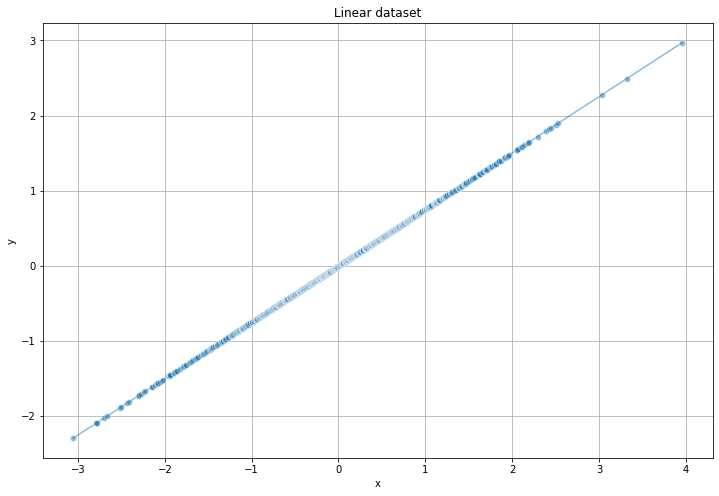

In [3]:
_ = plot_pandas_dataset(df_linear, "x", "y", "Linear dataset", x="x", y="y", marker='o', alpha=0.5)

##### 1b) nonlinear dataset

In [4]:
df_nonlinear = load_nonlinear_dataset()
df_nonlinear

,x,y
0,1.624345,-1.732828
1,-0.611756,-0.709996
2,-0.528172,-0.630857
3,-1.072969,-0.330732
4,0.865408,0.399216
...,...,...
995,-0.116444,0.387484
996,-2.277298,-0.639435
997,-0.069625,0.535373
998,0.353870,1.443023


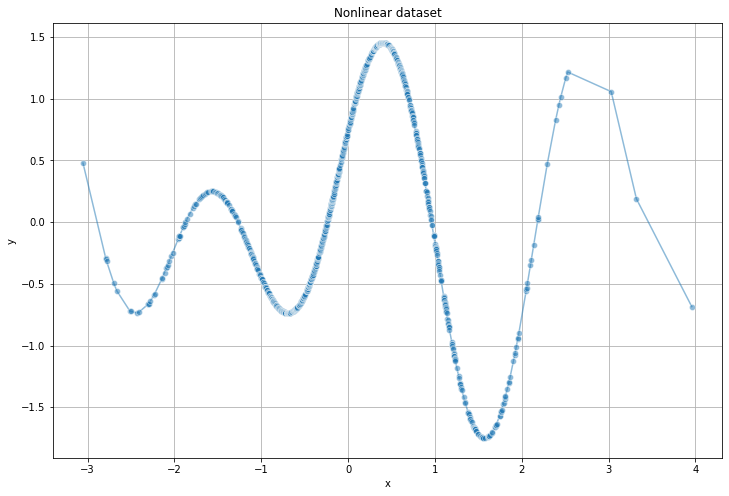

In [5]:
_ = plot_pandas_dataset(df_nonlinear, "x", "y", "Nonlinear dataset", x="x", y="y", marker='o', alpha=0.5)

### 2) Approximate both dataset with a linear regression model

In [6]:
lr = RidgeRegression(lamb=10)
y_pred = lr.fit_transform(df_linear.x.values, df_linear.y.values)
df_linear_augmented = augment_with_prediction(df_linear, y_pred)
df_linear_augmented

,y,y_pred
x,,
1.624345,1.218257,1.205750
-0.611756,-0.458842,-0.454106
-0.528172,-0.396124,-0.392061
-1.072969,-0.804730,-0.796464
0.865408,0.649041,0.642391
...,...,...
-0.116444,-0.087331,-0.086436
-2.277298,-1.707968,-1.690436
-0.069625,-0.052228,-0.051682


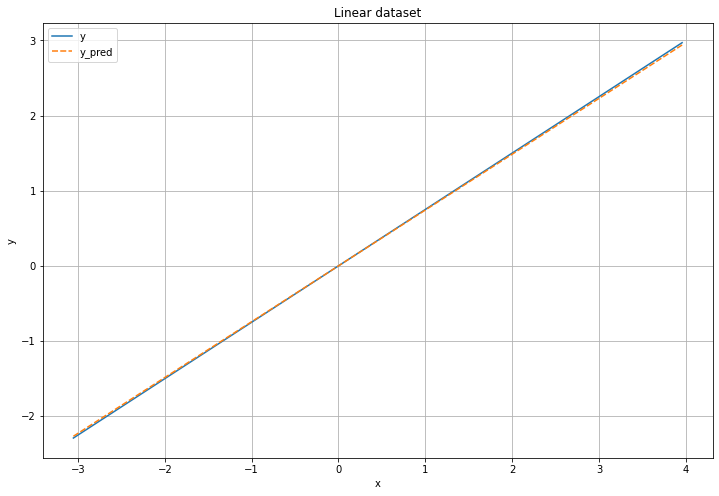

In [7]:
_ = plot_pandas_dataset(df_linear_augmented, "x", "y", "Linear dataset", ax=None)

In [8]:
lr = RidgeRegression(lamb=1e-5)
y_pred = lr.fit_transform(df_nonlinear.x.values.reshape(-1, 1), df_nonlinear.y.values)
df_nonlinear_augmented = augment_with_prediction(df_nonlinear, y_pred)
df_nonlinear_augmented

,y,y_pred
x,,
1.624345,-1.732828,0.053945
-0.611756,-0.709996,-0.020317
-0.528172,-0.630857,-0.017541
-1.072969,-0.330732,-0.035634
0.865408,0.399216,0.028740
...,...,...
-0.116444,0.387484,-0.003867
-2.277298,-0.639435,-0.075630
-0.069625,0.535373,-0.002312


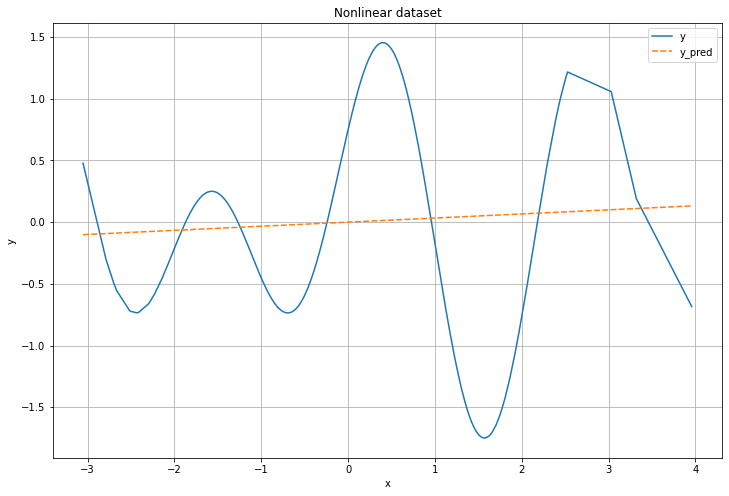

In [9]:
_ = plot_pandas_dataset(df_nonlinear_augmented, "x", "y", "Nonlinear dataset", ax=None)